## EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Univariate Statistics

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.shape

(545, 13)

In [ ]:
df.isnull().sum() # no nan values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
for col in df.columns:
  print(f'num of unique {col}: {df[col].nunique()}')

num of unique price: 219
num of unique area: 284
num of unique bedrooms: 6
num of unique bathrooms: 4
num of unique stories: 4
num of unique mainroad: 2
num of unique guestroom: 2
num of unique basement: 2
num of unique hotwaterheating: 2
num of unique airconditioning: 2
num of unique parking: 4
num of unique prefarea: 2
num of unique furnishingstatus: 3


In [ ]:
for col in df.columns:
  print(f'{col}: {df[col].dtype}')

price: int64
area: int64
bedrooms: int64
bathrooms: int64
stories: int64
mainroad: object
guestroom: object
basement: object
hotwaterheating: object
airconditioning: object
parking: int64
prefarea: object
furnishingstatus: object


In [ ]:
print(df.min())
print()
print(df.quantile(.25))
print()
print(df.median())
print()
print(df.quantile(.75))
print()
print(df.max())
print()
print(df.mean())
print()
print(df.mode().values[0])
print()
print(df.std())
print()
print(df.skew())
print()
print(df.kurt())

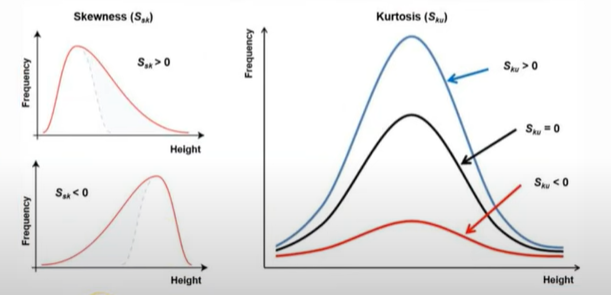

# Correlation and P-value Concepts


In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [ ]:
df2 =df.copy()
df2 =df2.replace({'yes':1,'no':0})
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df2['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df2['furnishingstatus']=df2['furnishingstatus'].replace({'furnished':2,'semi-furnished':1,'unfurnished':0})

In [ ]:
df2.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


In [ ]:
def bivariate_stats(df, label):
  corr_df = pd.DataFrame(columns=['r', 'p-value'])

  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and col != label:
      r, p = stats.pearsonr(df[label], df[col])
      corr_df.loc[col] = [round(r, 3), round(p, 3)]

  return corr_df.sort_values(by=['r'], ascending=False)

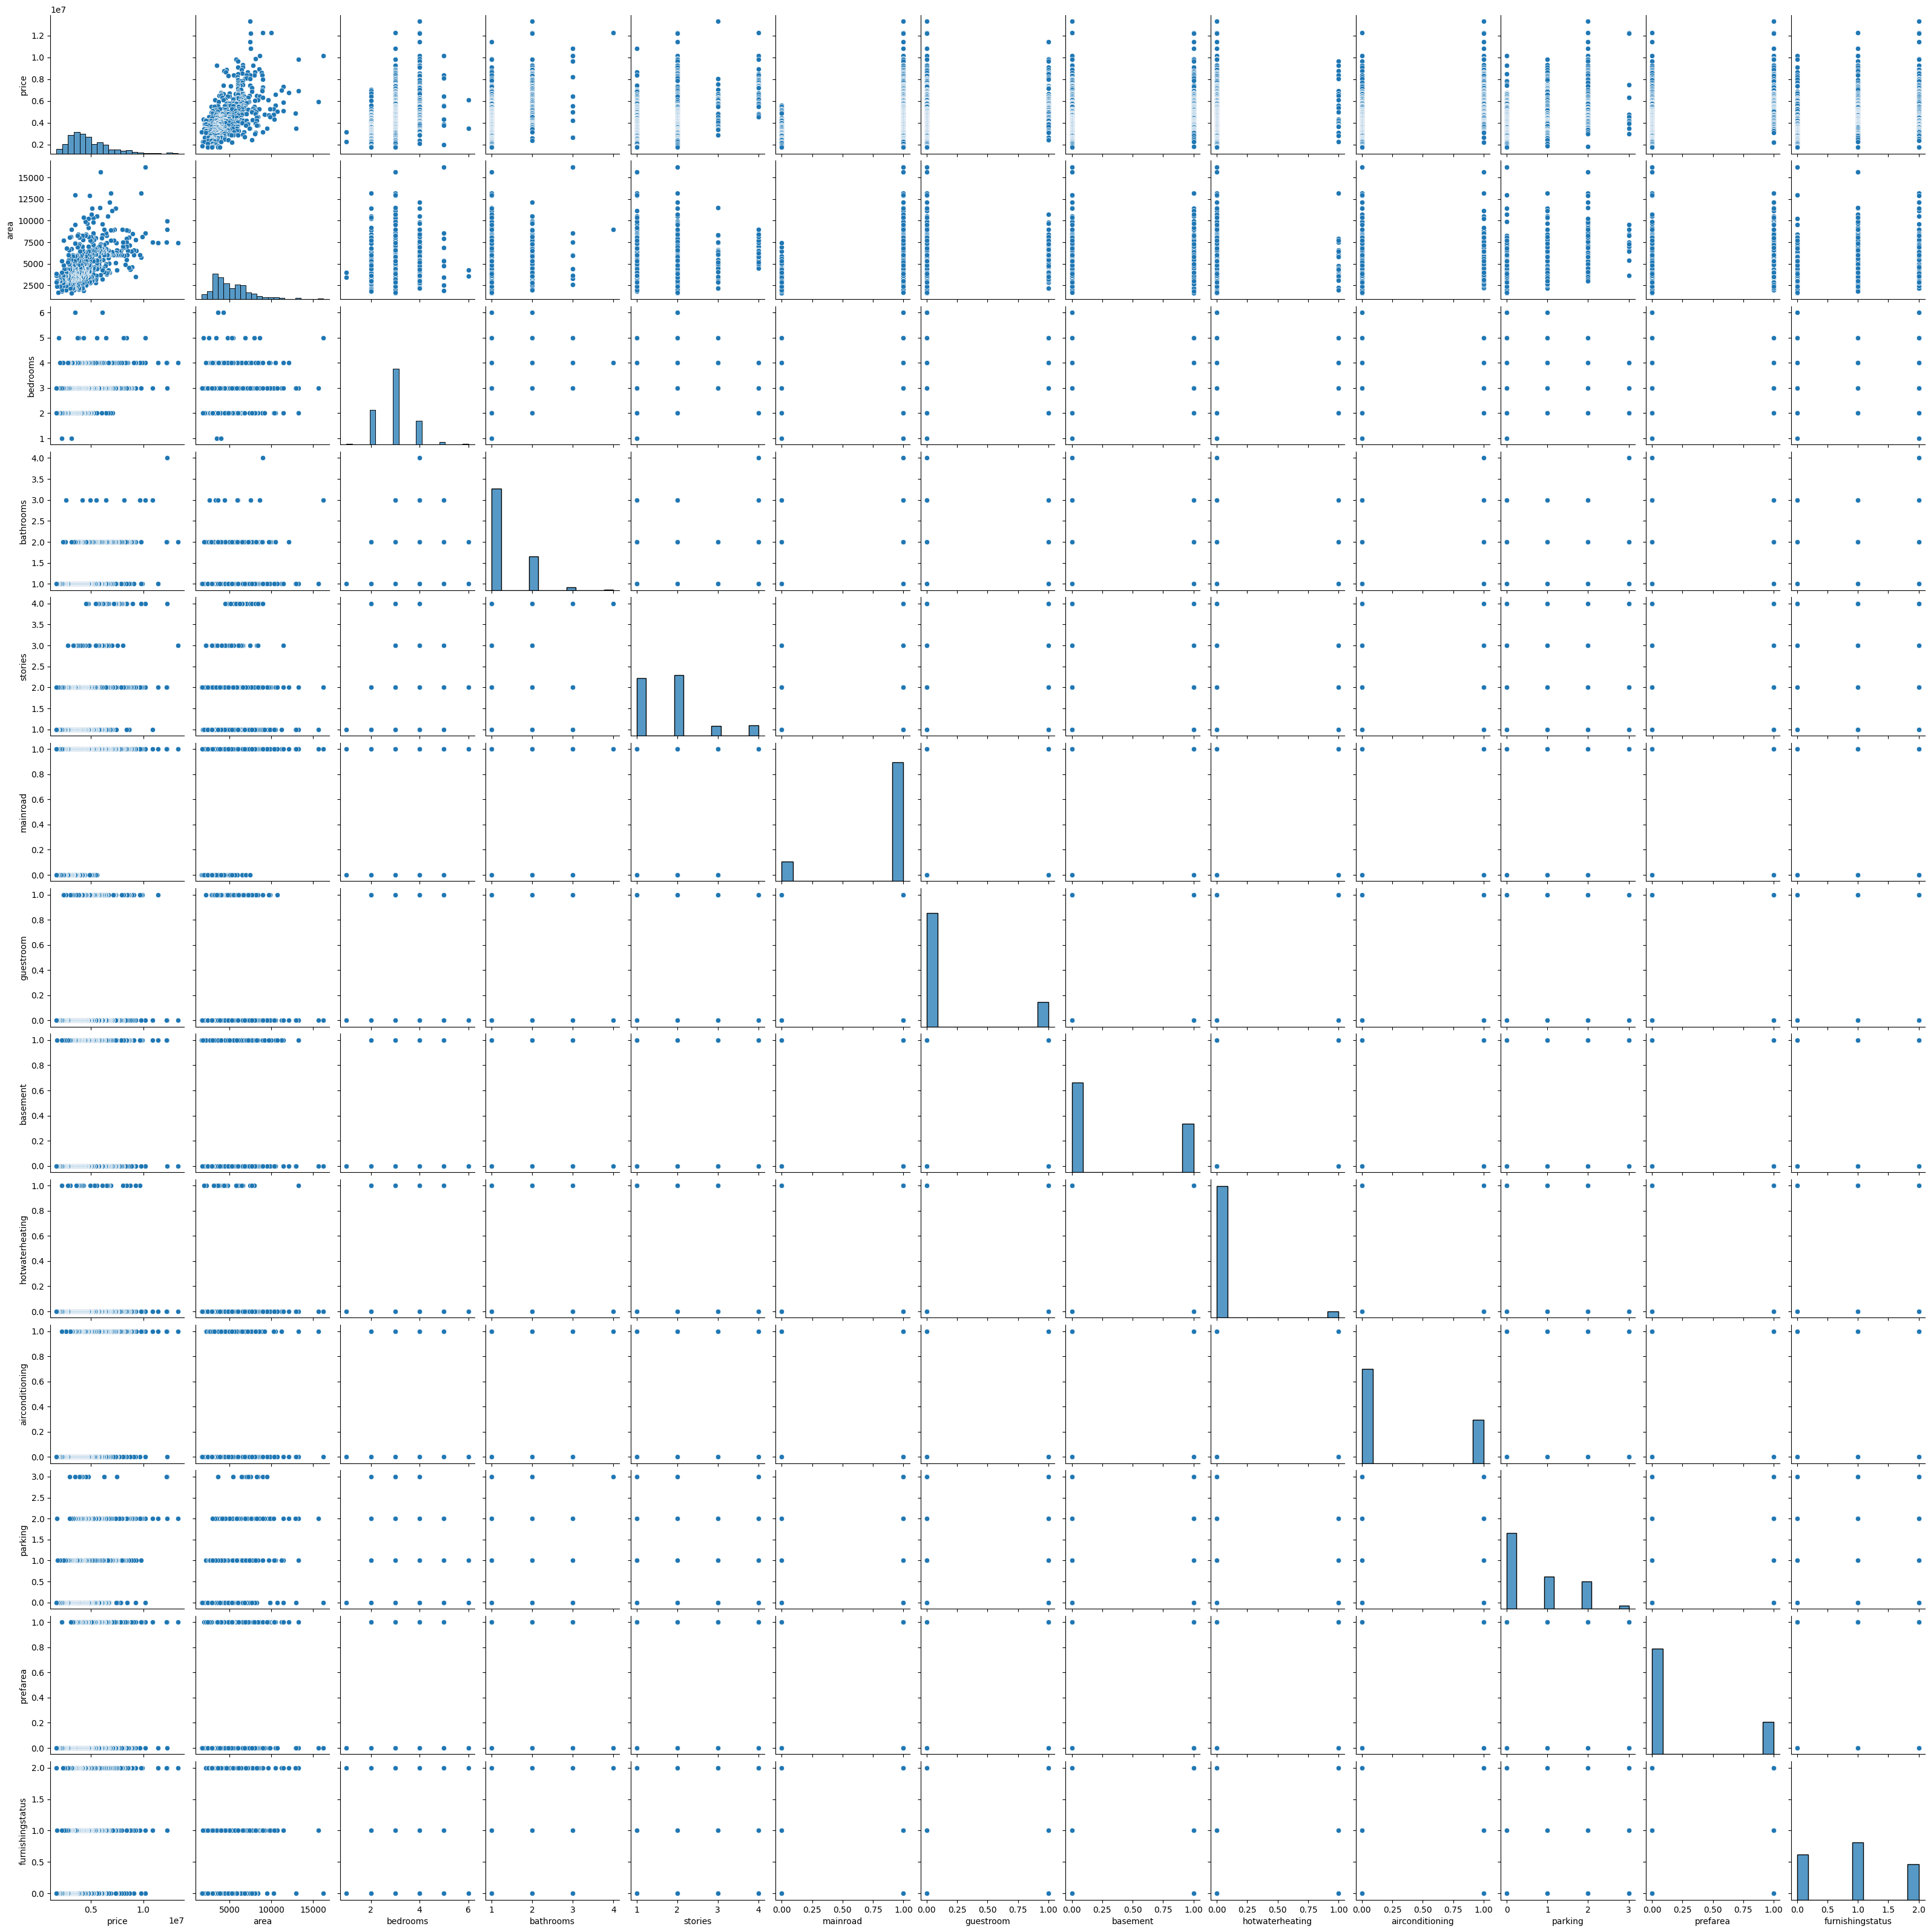

In [ ]:
sns.pairplot(df2)
plt.show()

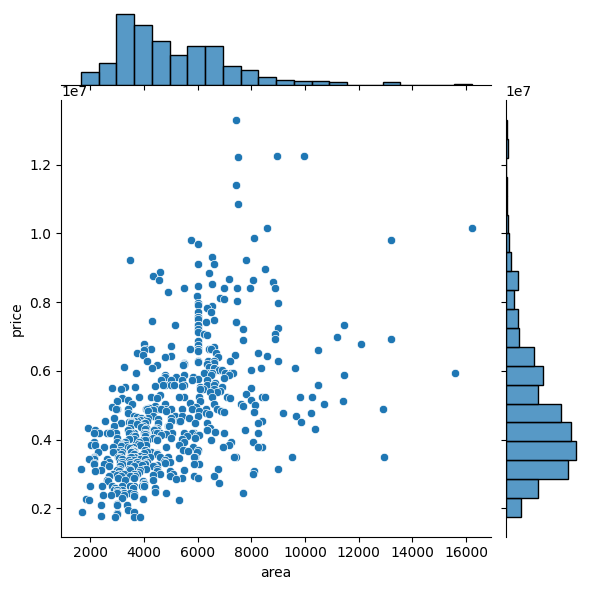

In [ ]:
# Joint plot

sns.jointplot(data=df2, x='area', y='price');

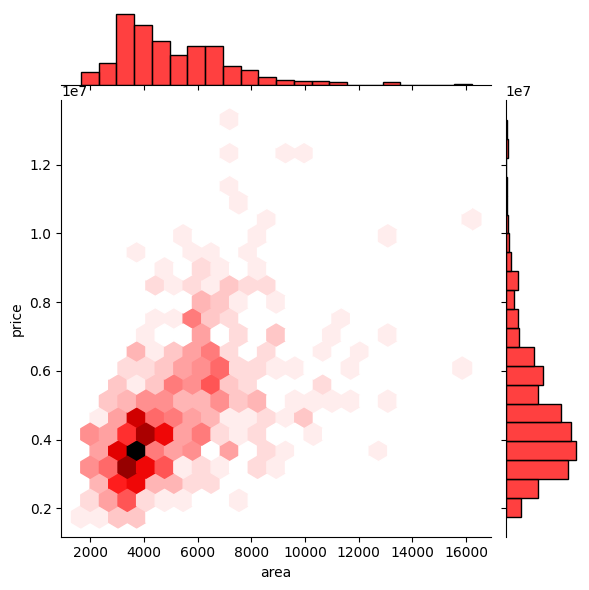

In [ ]:
# Hexbin plot

sns.jointplot(data=df, x='area', y='price', kind="hex", color="r");

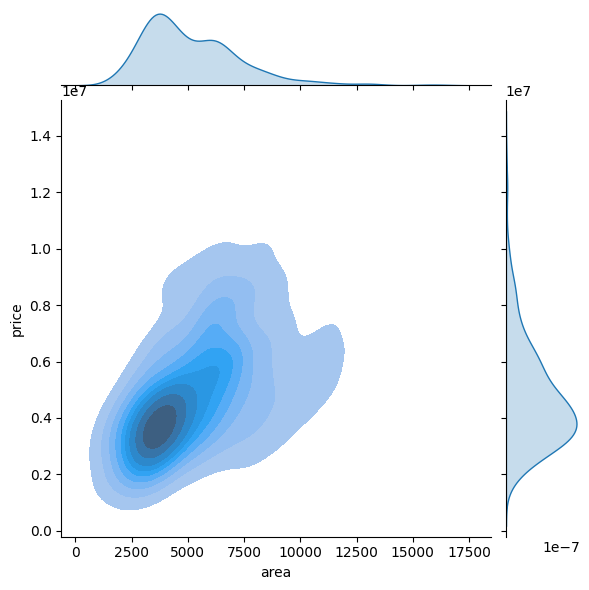

In [ ]:
# Kernel ddensity plot

sns.jointplot(data=df, x="area", y="price", kind="kde", fill=True);

In [ ]:
for column in df2:
  plt.hist(df2[column])
  plt.title(f'histogram of {column}')
  plt.show()

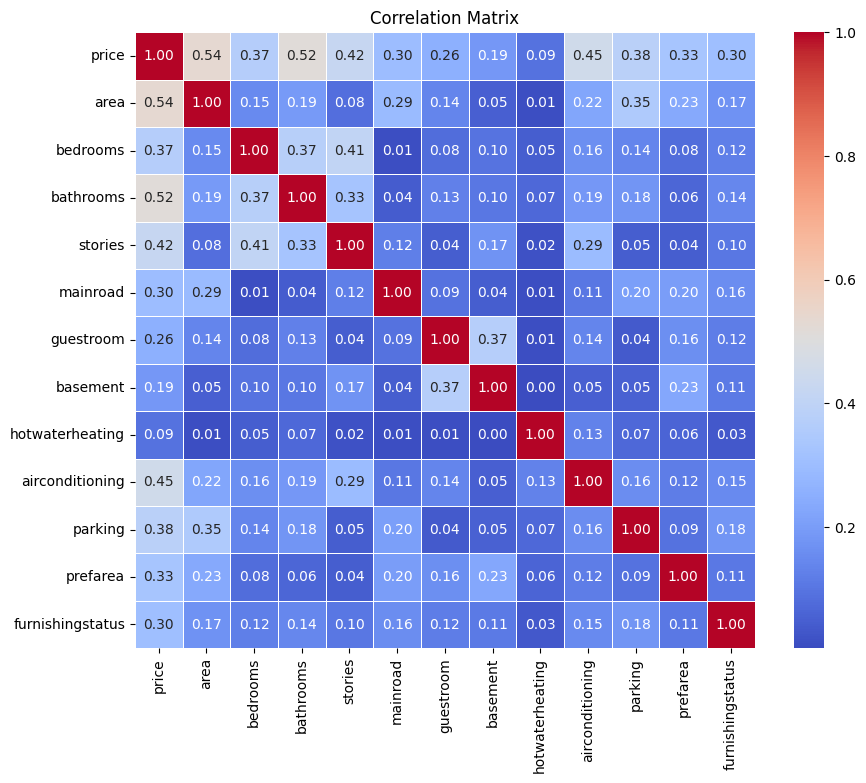

In [ ]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df2.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(abs(correlation_matrix), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df2, x='area', y='price', z='bathrooms',color='price')
fig.show()

In [ ]:
sns.pairplot(data = df2, vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],hue = 'price', palette ='tab10')
plt.show()

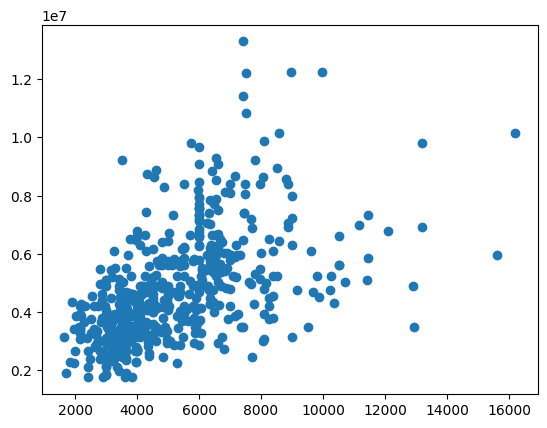

In [ ]:
plt.scatter(df['area'],df['price'])

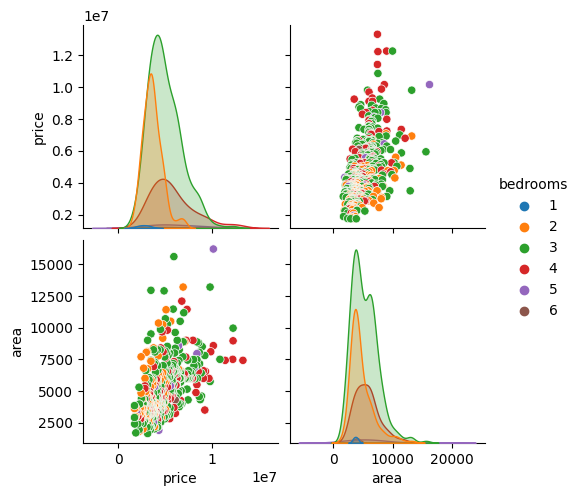

In [ ]:
sns.pairplot(data = df2, vars =['price','area'],hue = 'bedrooms', palette ='tab10')
plt.show()

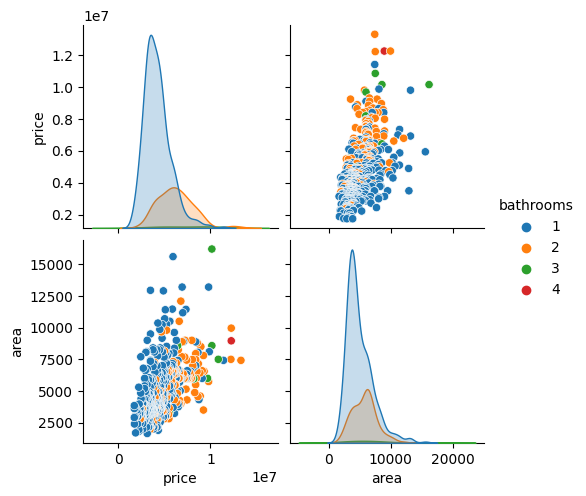

In [ ]:
sns.pairplot(data = df2, vars =['price','area'],hue = 'bathrooms', palette ='tab10')
plt.show()

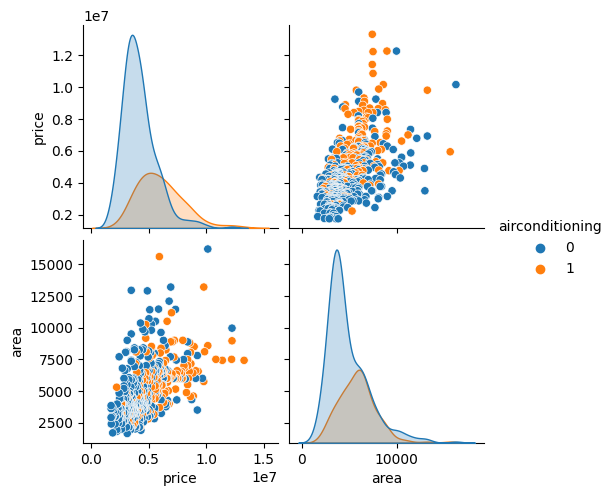

In [ ]:
sns.pairplot(data = df2, vars =['price','area'],hue = 'airconditioning', palette ='tab10')
plt.show()

Comparing two groups - t test

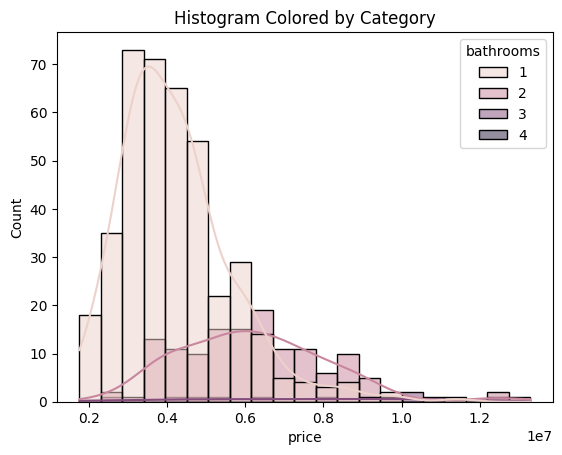

In [ ]:
# Plot histogram colored by category
sns.histplot(data=df2, x='price', hue='bathrooms', kde=True)
plt.title('Histogram Colored by Category')
plt.show()

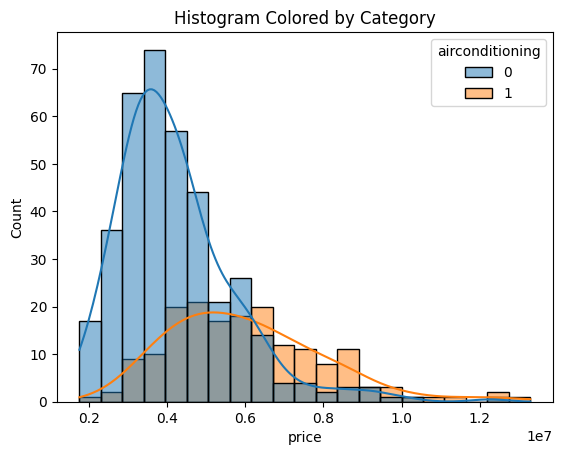

In [ ]:
sns.histplot(data=df2, x='price', hue='airconditioning', kde=True)
plt.title('Histogram Colored by Category')
plt.show()

In [ ]:
from scipy import stats
airconditioning_y = df2[df2['airconditioning']==1]
airconditioning_n = df2[df2['airconditioning']==0]
stats.ttest_ind(airconditioning_y['price'],airconditioning_n['price'])

TtestResult(statistic=11.839033782035843, pvalue=6.310969853530074e-29, df=543.0)

<ipython-input-16-98b45f452355>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price'],label='price')


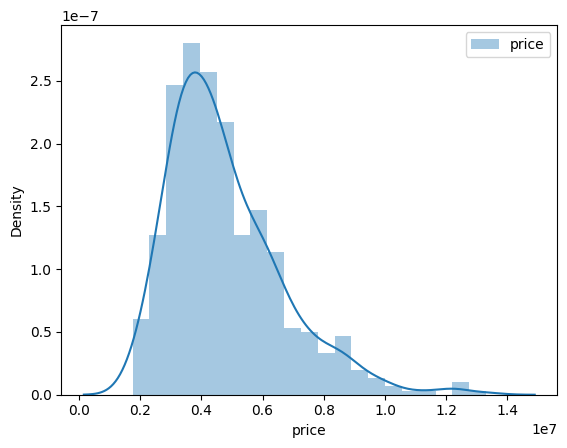

In [ ]:
sns.distplot(df2['price'],label='price')
plt.legend()

<ipython-input-32-a0b63b5957bd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  viz= sns.barplot(x=df2['furnishingstatus'],y=df2['price'],hue =df2['basement'],estimator=np.median,ci='sd',palette='Blues_d')


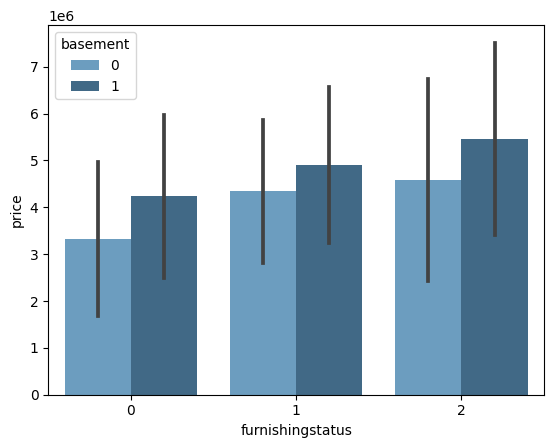

In [ ]:
viz= sns.barplot(x=df2['furnishingstatus'],y=df2['price'],hue =df2['basement'],estimator=np.median,ci='sd',palette='Blues_d')
viz.set_xticklabels(viz.get_xticklabels());

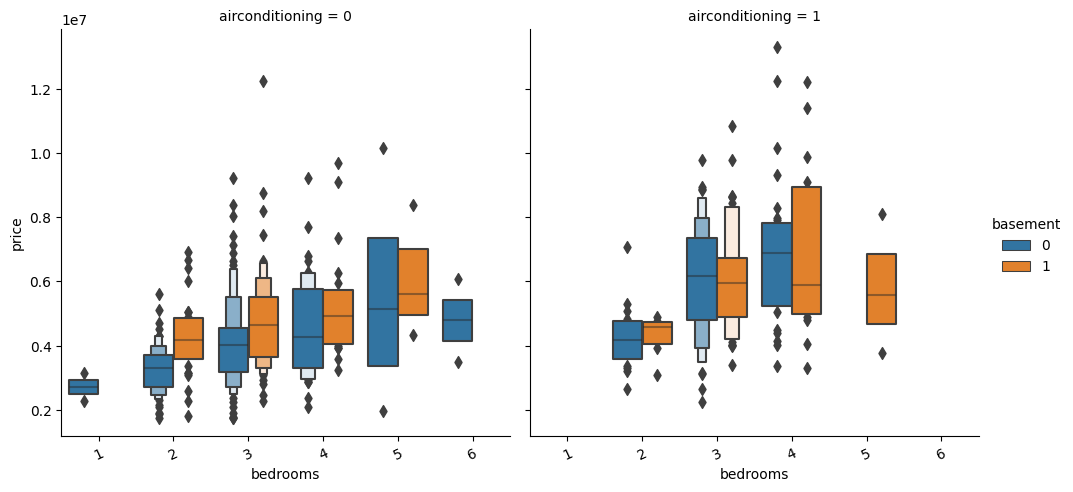

In [ ]:
viz= sns.catplot(data=df2,x='bedrooms',y='price',hue ='basement',col='airconditioning',estimator=np.median,ci='sd',kind='boxen')
viz.set_xticklabels(rotation=25);

<ipython-input-37-16b980e5b82e>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  viz= sns.catplot(data=df2,x='bedrooms',y='area',hue ='basement',col='airconditioning',estimator=np.median,ci='sd',kind='point')
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean

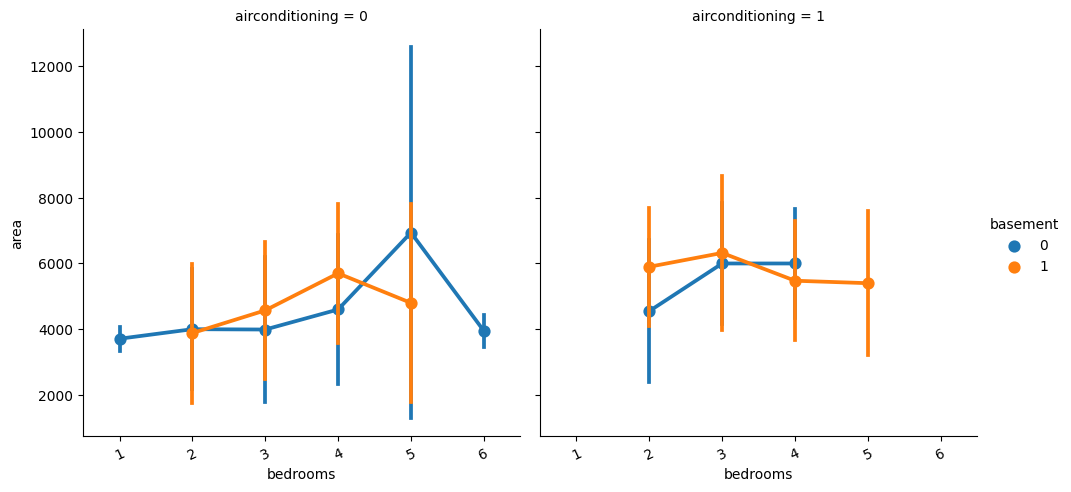

In [ ]:
viz= sns.catplot(data=df2,x='bedrooms',y='area',hue ='basement',col='airconditioning',estimator=np.median,ci='sd',kind='point')
viz.set_xticklabels(rotation=25);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.4% of the points cannot be plac

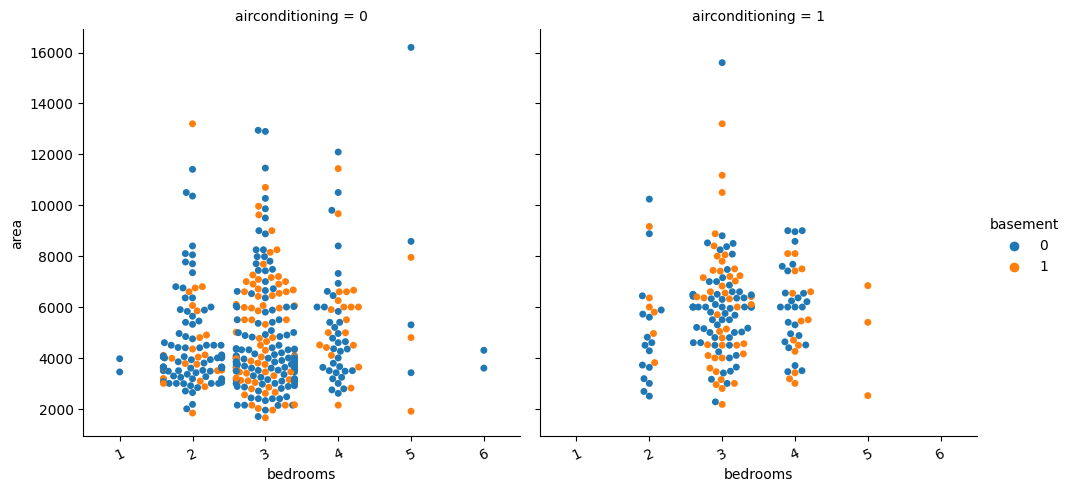

In [ ]:
viz= sns.catplot(data=df2,x='bedrooms',y='area',hue ='basement',col='airconditioning',estimator=np.median,ci='sd',kind='swarm')
viz.set_xticklabels(rotation=25);

# Stacked plots

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['price'],df['furnishingstatus'])
print(mc.tukeyhsd())

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
    group1         group2        meandiff   p-adj      lower         upper     reject
-------------------------------------------------------------------------------------
     furnished semi-furnished  -588171.7709 0.0064 -1038521.5649  -137821.9769   True
     furnished    unfurnished -1481864.5393    0.0 -1955270.1751 -1008458.9036   True
semi-furnished    unfurnished  -893692.7684    0.0 -1313257.0074  -474128.5294   True
-------------------------------------------------------------------------------------


In [ ]:
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame and 'column_to_check' is the column with potential outliers
column_to_check = 'area'
z_scores = stats.zscore(df[column_to_check])

# Define a threshold for Z-score (e.g., 3 standard deviations)
threshold = 3
outliers = (abs(z_scores) > threshold)

# Remove outliers from the DataFrame
df_no_outliers = df2[~outliers]


In [ ]:
df2.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Split the data into training and testing sets
X = df_no_outliers[['area','bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]  # Features
y = df_no_outliers['price']  # Target variable

# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
# Step 2: Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''

'\n# Step 2: Normalize the features using StandardScaler\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n'

Mean Squared Error: 1841039565607.2974


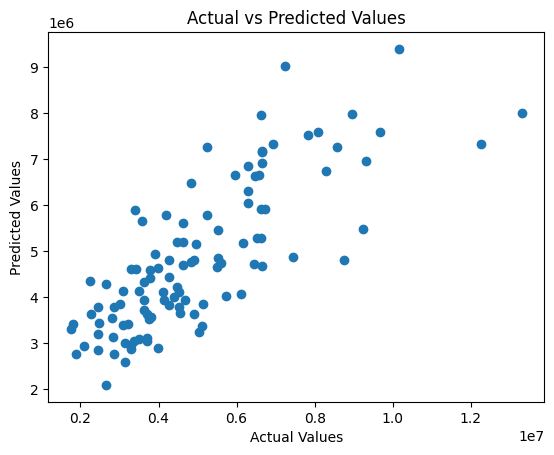

In [ ]:
# Step 3: Build a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 6: Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6121145901215574

In [ ]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
df_no_outliers.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
df_no_outliers.shape

(538, 13)

In [ ]:
df2.shape

(545, 13)